# Machine learning and Statistics - Project

### Student: Doris Zdravkovic

The aim of this project is to create a web service that uses machine learning to make predictions based on the data set powerproduction. The goal is to produce a model that accurately predicts wind turbine power output from wind speed values, as in the data set. I will then develop a web service that will respond with predicted power values based on speed values sent as HTTP requests. 

In [65]:
import numpy as np
# pandas is used to read in the csv and display in a pandas dataframe
import pandas as pd 
# matplotlib pyplot will be used for plotting the data set
import matplotlib.pyplot as plt
# seaborn will be used for plotting the data set
import seaborn as sns

In [66]:
# reading in the data set with pandas from my repository
df = pd.read_csv("powerproduction.csv")
# displaying the datas set
df

,speed,power
0,0.000,0.0
1,0.125,0.0
2,0.150,0.0
3,0.225,0.0
4,0.275,0.0
...,...,...
495,24.775,0.0
496,24.850,0.0
497,24.875,0.0
498,24.950,0.0


In [67]:
# information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   speed   500 non-null    float64
 1   power   500 non-null    float64
dtypes: float64(2)
memory usage: 7.9 KB


In [68]:
# shape of the data set. It has 500 rows and 2  columns
df.shape

(500, 2)

In [69]:
# first 10 rows of dataset
df.head(10)

,speed,power
0,0.000,0.000
1,0.125,0.000
2,0.150,0.000
3,0.225,0.000
4,0.275,0.000
5,0.325,4.331
6,0.400,5.186
7,0.450,3.826
8,0.501,1.048
9,0.526,5.553


In [70]:
# tells us more about the table (mean, std...)
df.describe()

,speed,power
count,500.000000,500.000000
mean,12.590398,48.014584
std,7.224991,41.614572
min,0.000000,0.000000
25%,6.324750,5.288000
50%,12.550500,41.645500
75%,18.775250,93.537000
max,25.000000,113.556000


Firstly, I am going to explain each of these functions independently. As we can see, there are only 2 variables in this table, speed and power. It shows frame or a series of numeric values.

- count: In the table above count is 500 which means that count represents the size of the data set.

- mean: Mean or Average is a central tendency of the data i.e. a number around which a whole data is spread out. In a way, it is a single number which can estimate the value of whole data set.

- std: Standard deviation is the measurement of average distance between each quantity and mean. That is, how data is spread out from mean. A low standard deviation indicates that the data points tend to be close to the mean of the data set, while a high standard deviation indicates that the data points are spread out over a wider range of values.

- min: Shows the smallest data figure collected, in this case it is zero.

- 25%: Also called first quartile. It means that 25% of data falls behind this measurement, and 75% is above it.

- 50%: The 50 percentile is the same as the median. Half of the data collected falls behind this measurement.

- 75%: Also called third quartile. It means that 75% of data falls behind this measurement, and 25% is above it.

- max: Shows the highest data figure collected, ie. maximum speed and power.

https://www.investopedia.com/terms/d/descriptive_statistics.asp

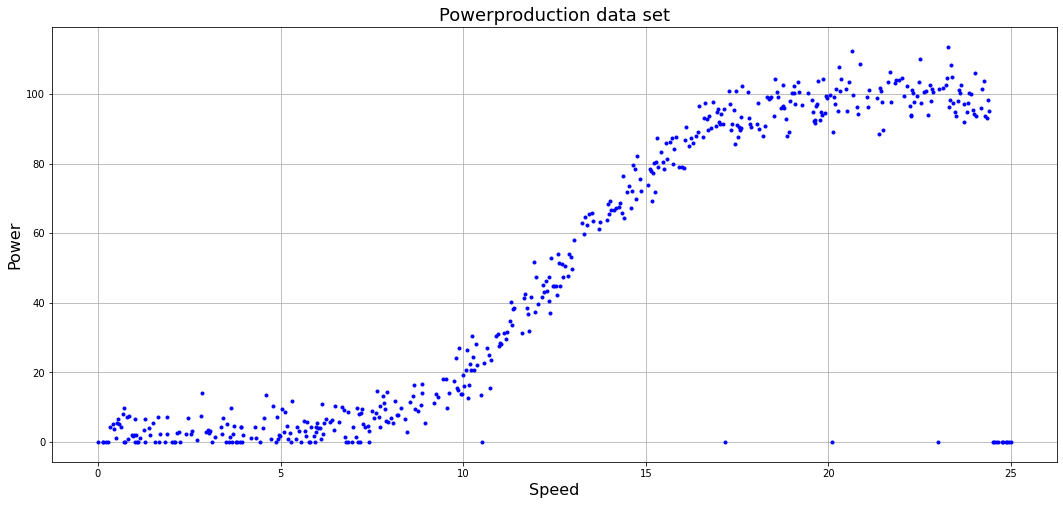

In [71]:
# Code adapted from: https://matplotlib.org/tutorials/introductory/customizing.html
plt.rcParams['figure.figsize'] = (18, 8)
plt.rcParams['lines.linewidth'] = 2.0

# matplotlib.pyplot used for plotting speed and power 
plt.plot(df['speed'], df['power'], '.b')
# adding a title to the plot
plt.title('Powerproduction data set', fontsize=18)
# adding labels to the x (speed) and y (power) axis
plt.xlabel('Speed', fontsize=16)
plt.ylabel('Power', fontsize=16)
# displaying grid on the plot
plt.grid()
# showing the plot
plt.show()

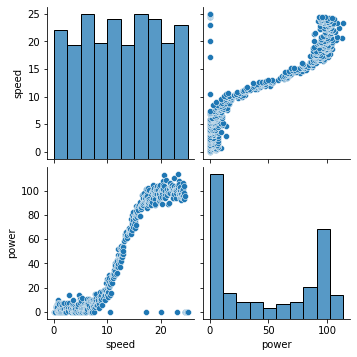

In [72]:
sns.pairplot(df)


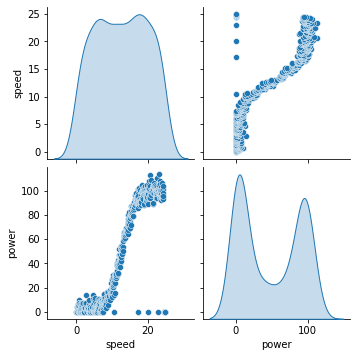

In [73]:
sns.pairplot(df, diag_kind = 'kde')

In [74]:
# cleaning the dataset by removing all data points where the power output is zero.


df = df[df['power'] !=0]
df

,speed,power
5,0.325,4.331
6,0.400,5.186
7,0.450,3.826
8,0.501,1.048
9,0.526,5.553
...,...,...
485,24.249,103.700
486,24.299,93.694
487,24.349,93.078
488,24.374,98.223


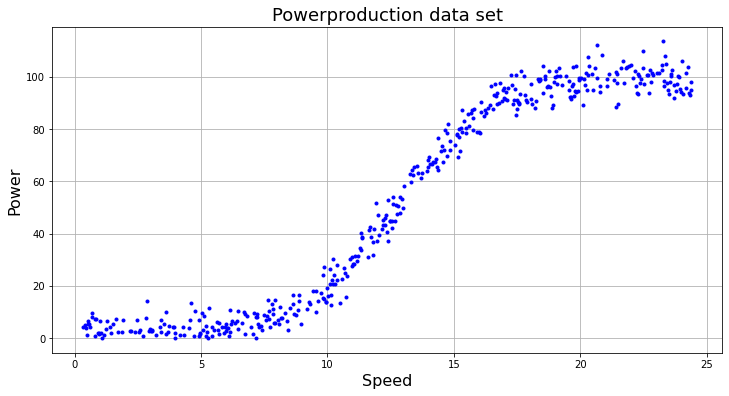

In [75]:
# Code adapted from: https://matplotlib.org/tutorials/introductory/customizing.html
plt.rcParams['figure.figsize'] = (12, 6)
plt.rcParams['lines.linewidth'] = 1.0

# matplotlib.pyplot used for plotting speed and power 
plt.plot(df['speed'], df['power'], '.b')
# adding a title to the plot
plt.title('Powerproduction data set', fontsize=18)
# adding labels to the x (speed) and y (power) axis
plt.xlabel('Speed', fontsize=16)
plt.ylabel('Power', fontsize=16)
# displaying grid on the plot
plt.grid()
# showing the plot
plt.show()

#### Model 1: Linear regression

In [76]:
df.corr()

,speed,power
speed,1.000000,0.947884
power,0.947884,1.000000


In [81]:
import numpy as np
from sklearn.linear_model import LinearRegression
# For evaluating model performance.
from sklearn.metrics import mean_squared_error, r2_score

# Code adjusted from: 
# https://scikit-learn.org/stable/modules/linear_model.html#ordinary-least-squares
# https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#sklearn.linear_model.LinearRegression.fit
# https://scikit-learn.org/stable/auto_examples/linear_model/plot_ols.html#sphx-glr-auto-examples-linear-model-plot-ols-py
# https://scikit-learn.org/stable/modules/linear_model.html

# Creating linear regression 
reg = LinearRegression()

# defining X and y as speed and power from the dataset
X = df[["speed"]]
y = df["power"]


print(X.shape)
print(y.shape)


# Training the model using the training sets
reg.fit(X, y)

# Making predictions using the testing set
y_pred = reg.predict(X)

# The coefficients
print('Coefficients: \n', reg.coef_)

# The mean squared error
print('Mean squared error: %.3f' % mean_squared_error(y, y_pred))

# The coefficient of determination
print('Coefficient of determination: %.3f' % r2_score(y, y_pred))


(451, 1)
(451,)
Coefficients: 
 [5.61882784]
Mean squared error: 166.325
Coefficient of determination: 0.898


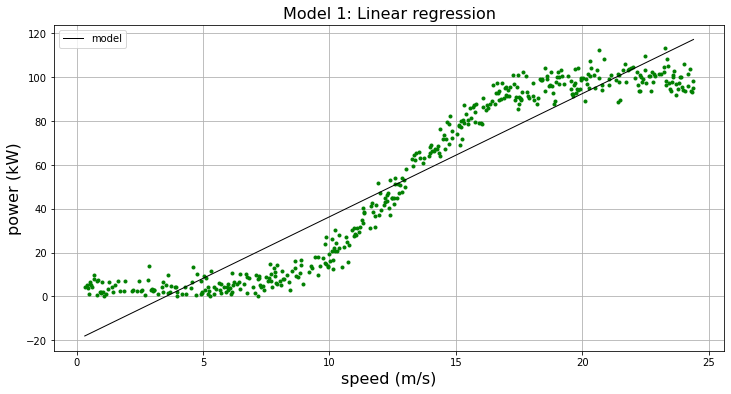

In [85]:
# Inspecting the fit using matplotlib
plt.plot(df['speed'], df['power'],  '.g')
plt.plot(df['speed'], y_pred, 'k-', label="model")
plt.xlabel('speed (m/s)', fontsize='16')
plt.ylabel('power (kW)', fontsize='16')
plt.title("Model 1: Linear regression", fontsize='16')
plt.grid()
plt.legend()